<a href="https://colab.research.google.com/github/Rohit2209Raj/Data-Analysis-Projects/blob/main/ZOMATO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Zomato data .csv')

In [3]:
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.shape



(148, 7)

In [5]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [6]:
df.dtypes

,0
name,object
online_order,object
book_table,object
rate,object
votes,int64
approx_cost(for two people),int64
listed_in(type),object


In [7]:
df['rate'].head().tolist()
df['rate'].apply(list).head()



,rate
0,"[4, ., 1, /, 5]"
1,"[4, ., 1, /, 5]"
2,"[3, ., 8, /, 5]"
3,"[3, ., 7, /, 5]"
4,"[3, ., 8, /, 5]"


In [8]:
df['rate']=df['rate'].astype(str).str[0:3]
df['rate']=df['rate'].astype(float)

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [12]:
# What type of restaurant do the majority of customers order from?

In [13]:
types=df['listed_in(type)'].value_counts()
types

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


/tmp/ipython-input-4043597428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types.index,y=types.values,palette='rainbow')


Text(0.5, 0, 'Type of Resturant')

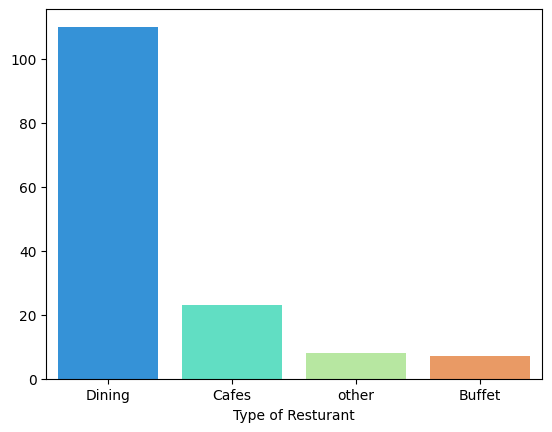

In [14]:
sns.barplot(x=types.index,y=types.values,palette='rainbow')
plt.xlabel("Type of Resturant")

In [15]:
# 2 How many votes has each type of restaurant received from customers?


<Axes: xlabel='listed_in(type)', ylabel='votes'>

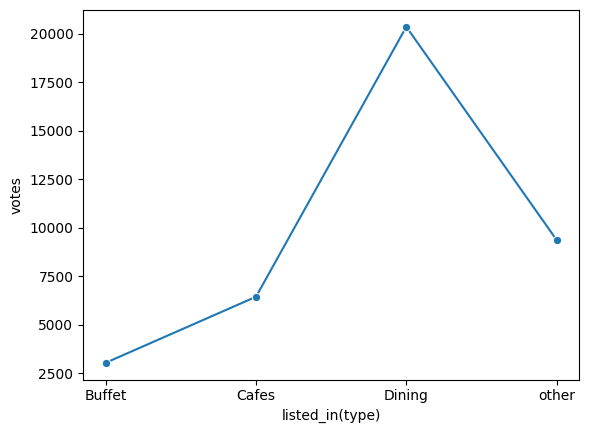

In [22]:
vote_count=df.groupby(by='listed_in(type)')['votes'].sum()
sns.lineplot(vote_count,marker='o')

In [23]:
# 3) What are the ratings that the majority of restaurants have received?



<Axes: xlabel='rate', ylabel='Count'>

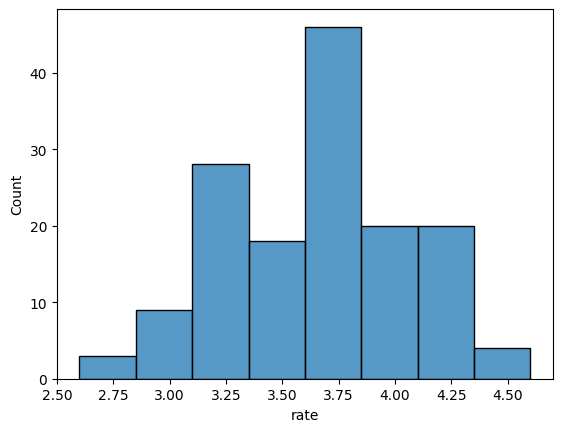

In [36]:
rate_count=df['rate'].value_counts()
# sns.histplot(x=rate_count.index,y=rate_count.values,bins=5)
sns.histplot(df['rate'],bins=8)

In [37]:
# 4)Zomato has observed that most couples order most of their food online. What is their
#average spending on each order?


In [38]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
# NOT CORRECT

In [40]:
print(df.groupby(by='online_order')['approx_cost(for two people)'].mean())

online_order
No     358.888889
Yes    510.344828
Name: approx_cost(for two people), dtype: float64


Text(0.5, 0, 'Online order or not')

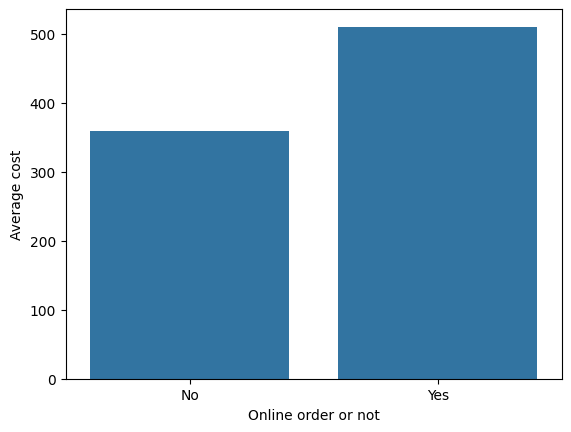

In [47]:
cost_count=df.groupby(by='online_order')['approx_cost(for two people)'].mean()
sns.barplot(x=cost_count.index,y=cost_count.values)
plt.ylabel("Average cost")
plt.xlabel("Online order or not")

In [ ]:
# Here again

<Axes: xlabel='approx_cost(for two people)', ylabel='Count'>

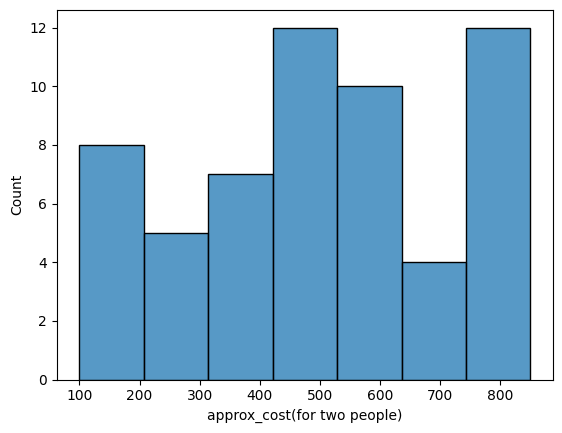

In [55]:
df2=df[df['online_order'] == 'Yes']
sns.histplot(df2['approx_cost(for two people)'],)

In [56]:
# 5) Which mode (online or offline) has received the maximum rating?


In [57]:
maxrate_count=df.groupby(by='online_order')['rate'].mean()

<Axes: xlabel='online_order'>

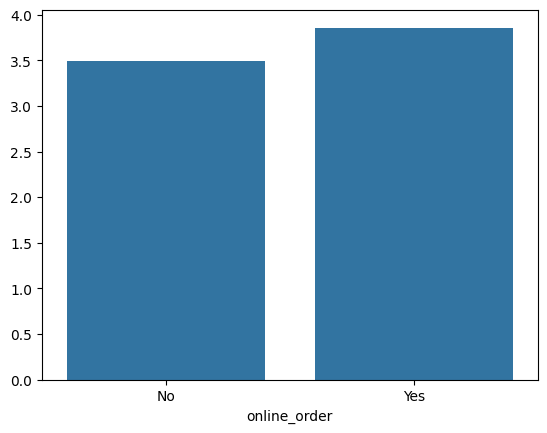

In [61]:
sns.barplot(x=maxrate_count.index,y=maxrate_count.values)

In [ ]:
# 6) Which type of restaurant received more offline orders, so that Zomato can provide those
# customers with some good offers?

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

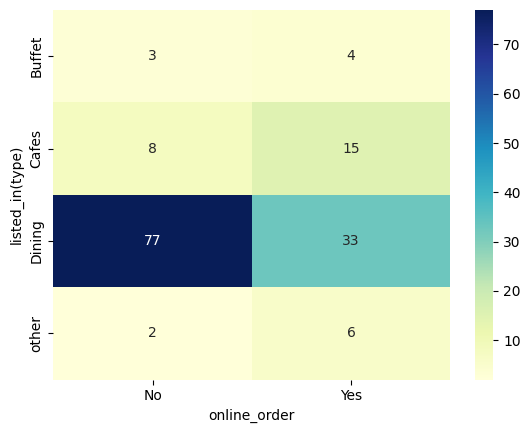

In [68]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size')
sns.heatmap(pivot_table,cmap='YlGnBu',annot=True)